# Analysis 4

* analyse the variable
* from previous analyses we can find out that the happiness scores difference between Western Europe and  Central and Eastern Europe is large. In this analysis, let's find out each how variables influence the outcomes.

In [1]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# define the function to calculate and create the total score of happiness.
def getTotalScore(str):
    # load the data
    data = pd.read_csv(str)
    # get all the columns that to be added together
    colums = data.ix[:,2:]
    # add the new column named 'total score'
    # data['total score'] = colums.sum(axis = 1).head()
    data['total score'] = np.sum(colums,axis = 1)
    # return the data frame
    return data

In [3]:
data2015=getTotalScore('data/2015.csv')
data2016=getTotalScore('data/2016.csv')

In [4]:
#define the function to sort based on total score and add a new column named rank
def getRank(data):
    newData = data.sort_values(by='total score',ascending=False)
    newData['Rank'] = range(1,len(data) + 1)
    newData.index = range(0,len(data))
    return newData

In [5]:
data1 = getRank(data2015)
data2 = getRank(data2016)

In [6]:
data1['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [9]:
w_europe = data1[data1.Region=='Western Europe']
ec_europe = data1[data1.Region=='Central and Eastern Europe']
europe = pd.concat([w_europe,ec_europe],axis=0)
europe.head()

Country          Region  Economy (GDP per Capita)   Family  \
0  Switzerland  Western Europe                   1.39651  1.34951   
1      Iceland  Western Europe                   1.30232  1.40223   
2      Denmark  Western Europe                   1.32548  1.36058   
3       Norway  Western Europe                   1.45900  1.33095   
5      Finland  Western Europe                   1.29025  1.31826   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
5                   0.88911  0.64169                        0.41372   

   Generosity  Dystopia Residual  total score  Rank  
0     0.29678            2.51738      7.58696     1  
1     0.43630            2.70201      7.56092     2  
2     0.34139            2.49204      7.52708     3  
3     0.34699            2.46531      7.52222     4  
5     0.23351            2.61955      7.40609     6

In [14]:
se_Asia = data1[data1.Region=='Southeastern Asia']
s_Asia = data1[data1.Region=='Southern Asia']
e_Asia = data1[data1.Region=='Eastern Asia']

asia = pd.concat([se_Asia,s_Asia,e_Asia],axis=0)
asia.head()

Country             Region  Economy (GDP per Capita)   Family  \
23  Singapore  Southeastern Asia                   1.52186  1.02000   
33   Thailand  Southeastern Asia                   0.96690  1.26504   
60   Malaysia  Southeastern Asia                   1.12486  1.07023   
73  Indonesia  Southeastern Asia                   0.82827  1.08708   
74    Vietnam  Southeastern Asia                   0.63216  0.91226   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
23                   1.02525  0.54252                        0.49210   
33                   0.73850  0.55664                        0.03187   
60                   0.72394  0.53024                        0.10501   
73                   0.63793  0.46611                        0.00000   
74                   0.74676  0.59444                        0.10441   

    Generosity  Dystopia Residual  total score  Rank  
23     0.31105            1.88501      6.79779    24  
33     0.57630            2.31945      6.45470    34  
60     0.33075            1.88541      5.77044    61  
73     0.51535            1.86399      5.39873    74  
74     0.16860            2.20173      5.36036    75

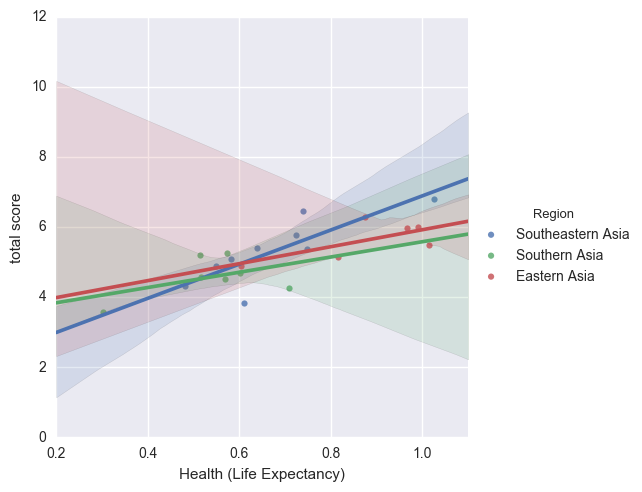

In [42]:
sns.lmplot(data=asia,x='Health (Life Expectancy)',y='total score',hue="Region")

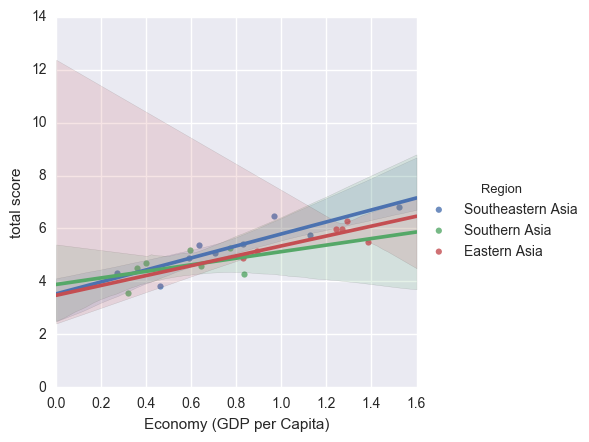

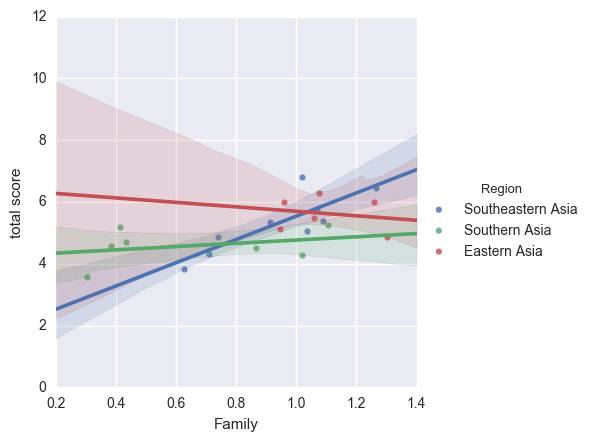

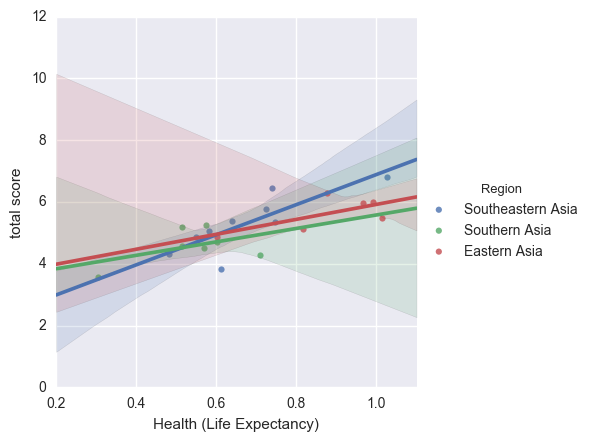

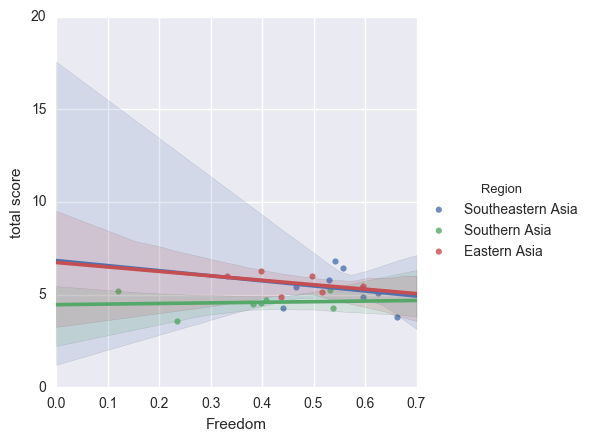

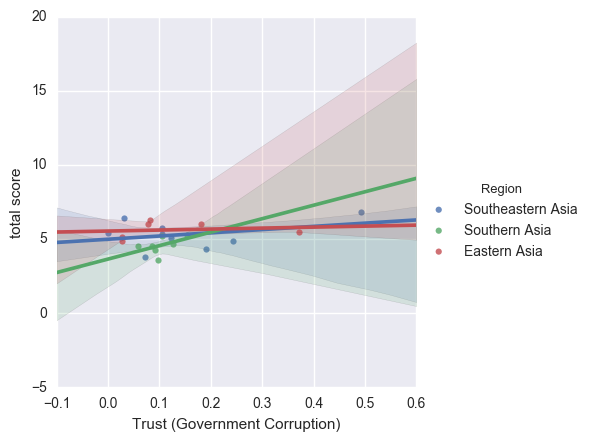

In [38]:
selectCols= ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
for one in selectCols:
    sns.lmplot(data=asia, x = one, y='total score', hue='Region',size=4.5)
    
# plt.subplots_adjust(wspace=0, hspace=0)

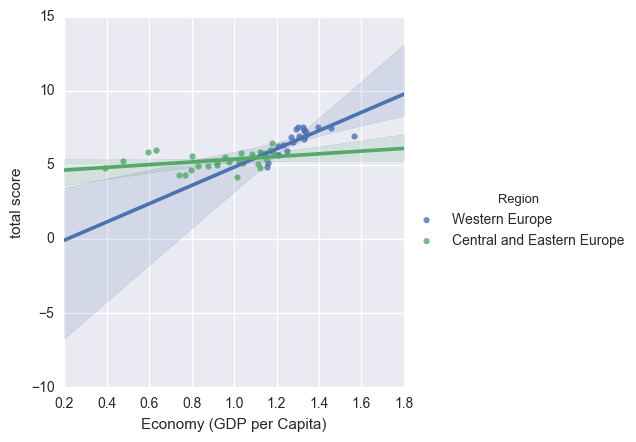

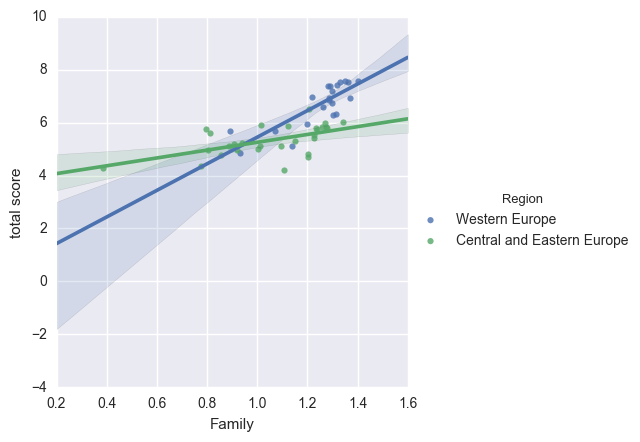

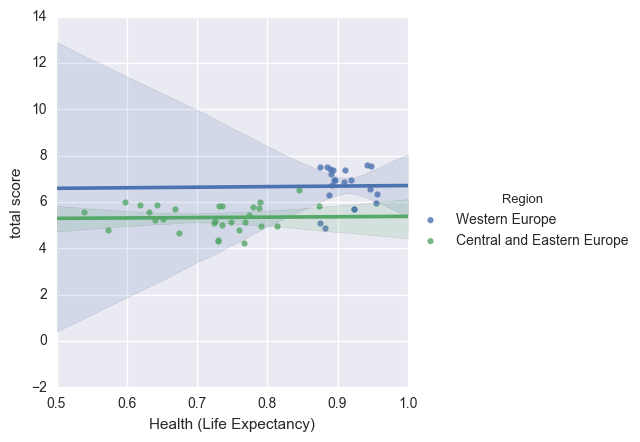

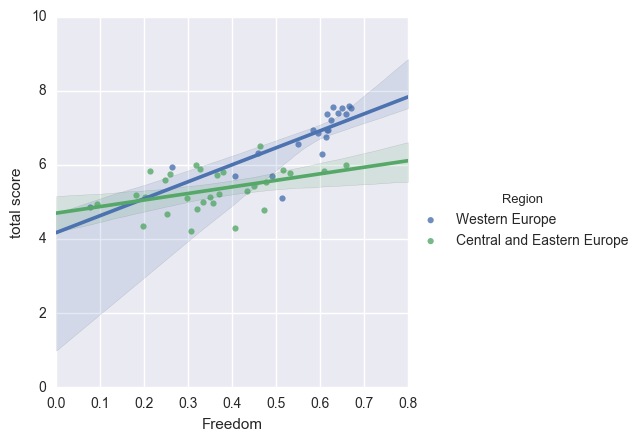

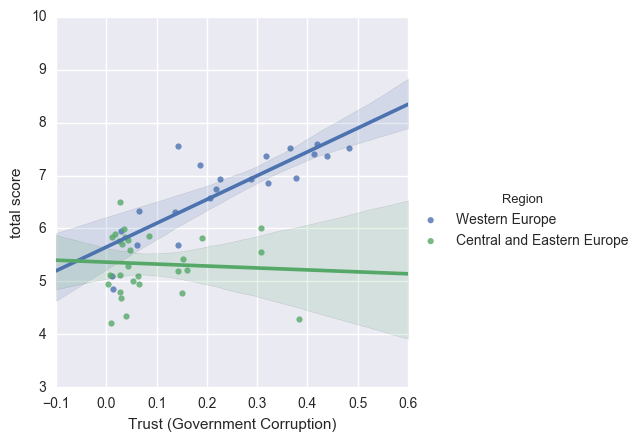

In [39]:
selectCols= ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
for one in selectCols:
    sns.lmplot(data=europe, x = one, y='total score', hue='Region',size=4.5)
    
# plt.subplots_adjust(wspace=0, hspace=0)

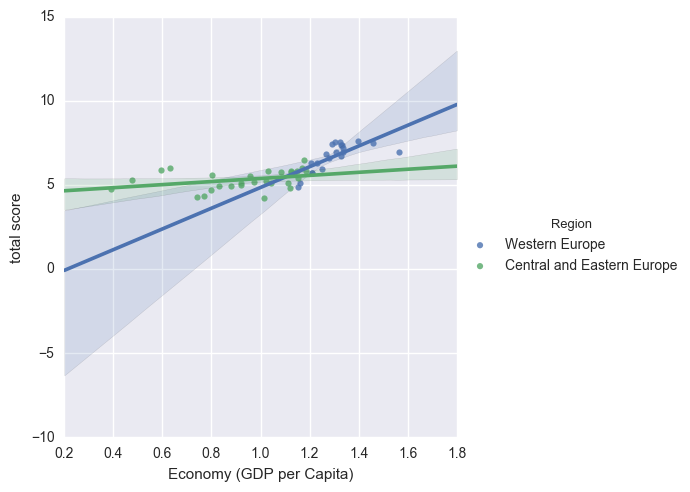

In [11]:
sns.lmplot(data=europe,x='Economy (GDP per Capita)',y='total score',hue="Region")

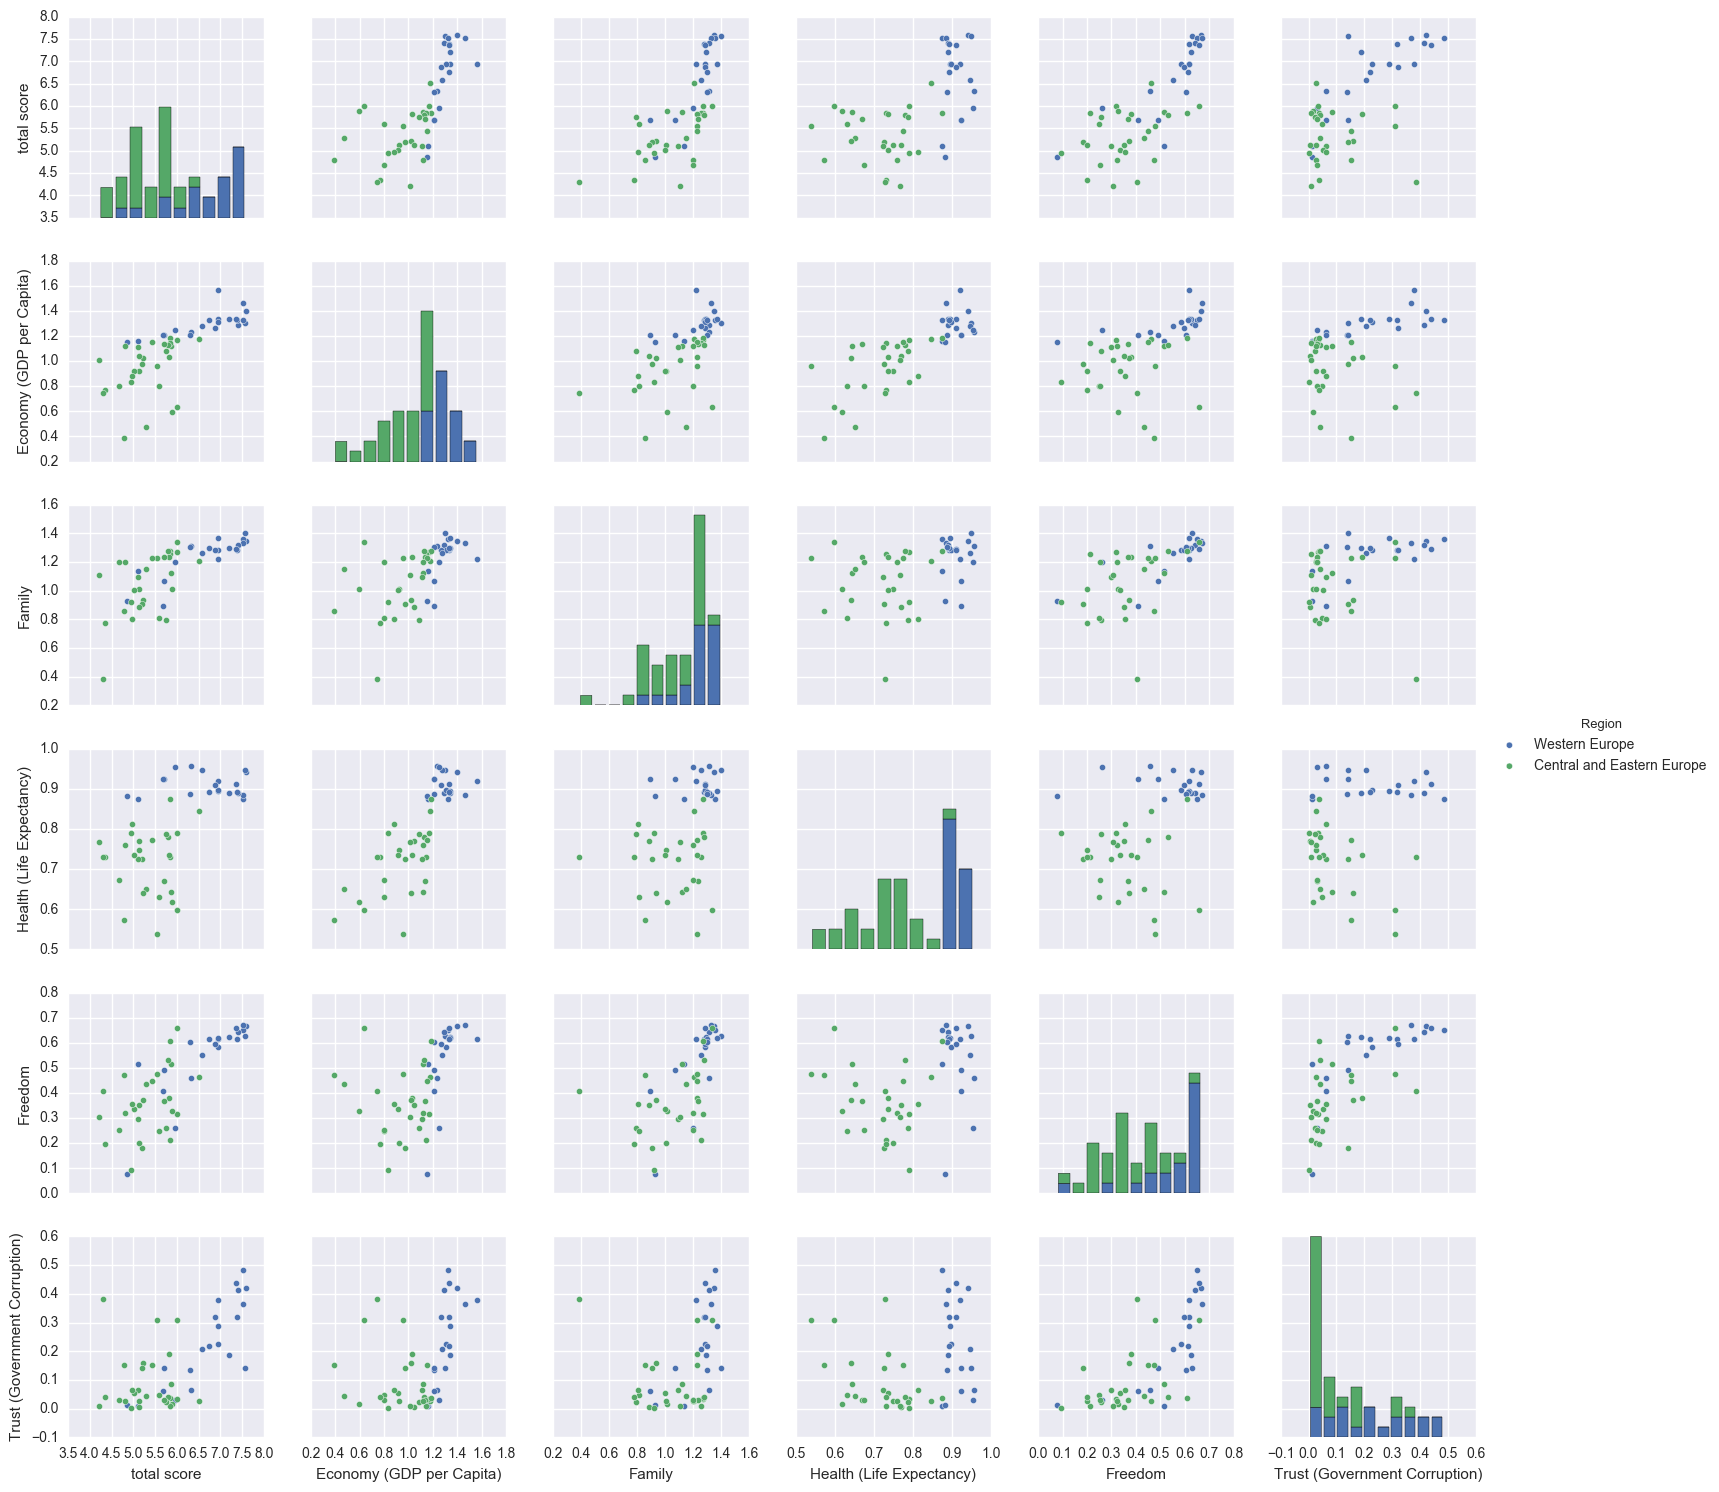

In [13]:
selectCols=  ['total score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Region']
sns.pairplot(europe[selectCols], hue='Region',size=2.5)

In [ ]:
# apply the PCA 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
data2015.head()

Country                           Region  Economy (GDP per Capita)  \
0  Afghanistan                    Southern Asia                   0.31982   
1      Albania       Central and Eastern Europe                   0.87867   
2      Algeria  Middle East and Northern Africa                   0.93929   
3       Angola               Sub-Saharan Africa                   0.75778   
4    Argentina      Latin America and Caribbean                   1.05351   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  0.30285                   0.30335  0.23414                        0.09719   
1  0.80434                   0.81325  0.35733                        0.06413   
2  1.07772                   0.61766  0.28579                        0.17383   
3  0.86040                   0.16683  0.10384                        0.07122   
4  1.24823                   0.78723  0.44974                        0.08484   

   Generosity  Dystopia Residual  total score  
0     0.36510            1.95210      3.57455  
1     0.14272            1.89894      4.95938  
2     0.07822            2.43209      5.60460  
3     0.12344            1.94939      4.03290  
4     0.11451            2.83600      6.57406

In [47]:
df = data2015.ix[:,2:-1]

In [49]:
X_std = StandardScaler().fit_transform(df)

In [51]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [52]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [99]:
eig_pairs1 = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# eig_pairs.sort(reverse=True)

In [100]:
eig_pairs1

[(2.8998868143778158,
  array([ 0.49931645,  0.45265178,  0.47867305,  0.41885976,  0.32896949,
          0.17466946,  0.04987698])),
 (1.3678196069281936,
  array([ 0.31135195,  0.23107241,  0.2428812 , -0.33910987, -0.41844308,
         -0.63957515,  0.30253552])),
 (1.0074757567646027,
  array([-0.20867813,  0.07426284, -0.23852648,  0.23128222,  0.08272121,
          0.08781997,  0.90884376])),
 (0.15068643206936874,
  array([-0.75559967,  0.21424596,  0.5929985 , -0.04127411,  0.11333   ,
         -0.12827433, -0.02278232])),
 (0.70733802707912563,
  array([-0.04193984,  0.23561227,  0.13335323, -0.0532868 , -0.72472621,
          0.6294931 ,  0.02481347])),
 (0.52366365719237884,
  array([-0.19354103,  0.55125738, -0.45084797,  0.48171367, -0.2118631 ,
         -0.31579256, -0.28059635])),
 (0.38771569284966267,
  array([ 0.00696697, -0.57523714,  0.28686538,  0.64767155, -0.3562077 ,
         -0.20070142,  0.01088658]))]

In [105]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

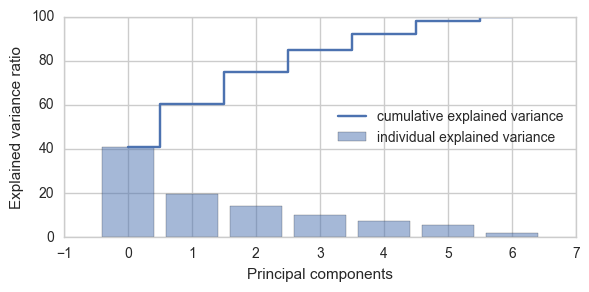

In [106]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 3))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [103]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

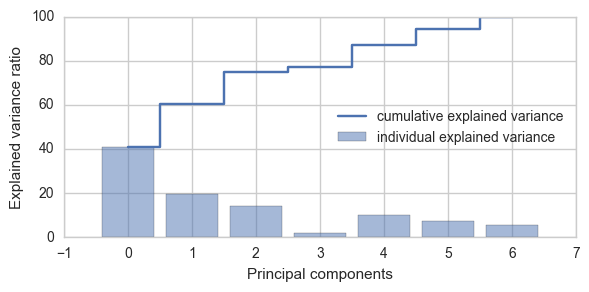

In [104]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 3))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [76]:
from sklearn.decomposition import PCA

In [77]:
X = np.array(X_std)

In [78]:
pca=PCA(n_components=6)

In [79]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
Y = pd.DataFrame(pca.transform(X))

In [92]:
Y.head()

0         1         2         3         4         5
0  2.942569  1.442986  0.082748 -0.260193  1.332080  0.161303
1  0.480874 -0.854291  0.804998  0.041225  0.479697  0.684329
2  0.268802 -1.337895 -0.226689  0.852816  0.129276 -0.643638
3  2.503386 -0.843638  0.416558  0.376814 -0.072743 -1.271866
4 -0.786153 -1.717482 -0.931201 -0.054945 -0.238692  0.116693

In [96]:
pd.DataFrame(eig_pairs)

0                                                  1
0  2.899887  [0.499316453568, 0.452651780728, 0.47867305437...
1  1.367820  [0.3113519516, 0.231072409111, 0.242881196743,...
2  1.007476  [-0.208678126338, 0.0742628410766, -0.23852648...
3  0.707338  [-0.0419398376977, 0.235612266726, 0.133353233...
4  0.523664  [-0.193541028528, 0.551257379728, -0.450847968...
5  0.387716  [0.00696696507614, -0.575237138827, 0.28686538...
6  0.150686  [-0.755599670928, 0.214245963239, 0.5929985028...

In [89]:
pca.explained_variance_ratio_

array([ 0.41164759,  0.19416607,  0.14301419,  0.10040874,  0.07433562,
        0.0550374 ])

In [101]:
pd.DataFrame(eig_pairs1)

0                                                  1
0  2.899887  [0.499316453568, 0.452651780728, 0.47867305437...
1  1.367820  [0.3113519516, 0.231072409111, 0.242881196743,...
2  1.007476  [-0.208678126338, 0.0742628410766, -0.23852648...
3  0.150686  [-0.755599670928, 0.214245963239, 0.5929985028...
4  0.707338  [-0.0419398376977, 0.235612266726, 0.133353233...
5  0.523664  [-0.193541028528, 0.551257379728, -0.450847968...
6  0.387716  [0.00696696507614, -0.575237138827, 0.28686538...